# How to use Node Group

## Introduction
In this tutorial, you will learn how to use `Node Group` in WorkTree.

Load the AiiDA profile.

In [1]:
%load_ext aiida
from aiida import load_profile
load_profile()

Profile<uuid='57ccbf7d9e2b41b39edb2bfdaf725feb' name='default'>

## Workflow
Suppose we want to make `(x+y)*z` as a node group.

### Create node
In order to create a dynamic workflow based on the input value, we need a create a `WorkTree` and then treat this `WorkTree` as a node.

In [4]:
from aiida_worktree import node, WorkTree

# define add node
@node.calcfunction()
def add(x, y):
    return x + y

# define multiply node
@node.calcfunction()
def multiply(x, y):
    return x*y


# use node.group decorator, expose the output of "multiply" node
# as the output of the `WorkTree`.
@node.group(outputs = [["multiply.result", "result"]])
def add_multiply(x, y, z):
    # Create a WorkTree
    wt = WorkTree()
    wt.nodes.new(add, name="add", x=x, y=y)
    wt.nodes.new(multiply, name="multiply", x=z)
    wt.links.new(wt.nodes["add"].outputs[0], wt.nodes["multiply"].inputs["y"])
    # don't forget to return the `wt`
    return wt

### Create the workflow


In [5]:

from aiida_worktree import WorkTree
from aiida.orm import Int

wt = WorkTree("test_node_group")
# create a node using the node group
add_multiply1 = wt.nodes.new(add_multiply, x=Int(2), y=Int(3), z=Int(4))
add_multiply2 = wt.nodes.new(add_multiply, x=Int(2), y=Int(3))
# link the output of int node to the input of add node
wt.links.new(add_multiply1.outputs[0], add_multiply2.inputs["z"])
wt.submit(wait=True)

WorkTree node created, PK: 5249


Generate node graph from the AiiDA process,and we can see that the `multiply` node is executed.

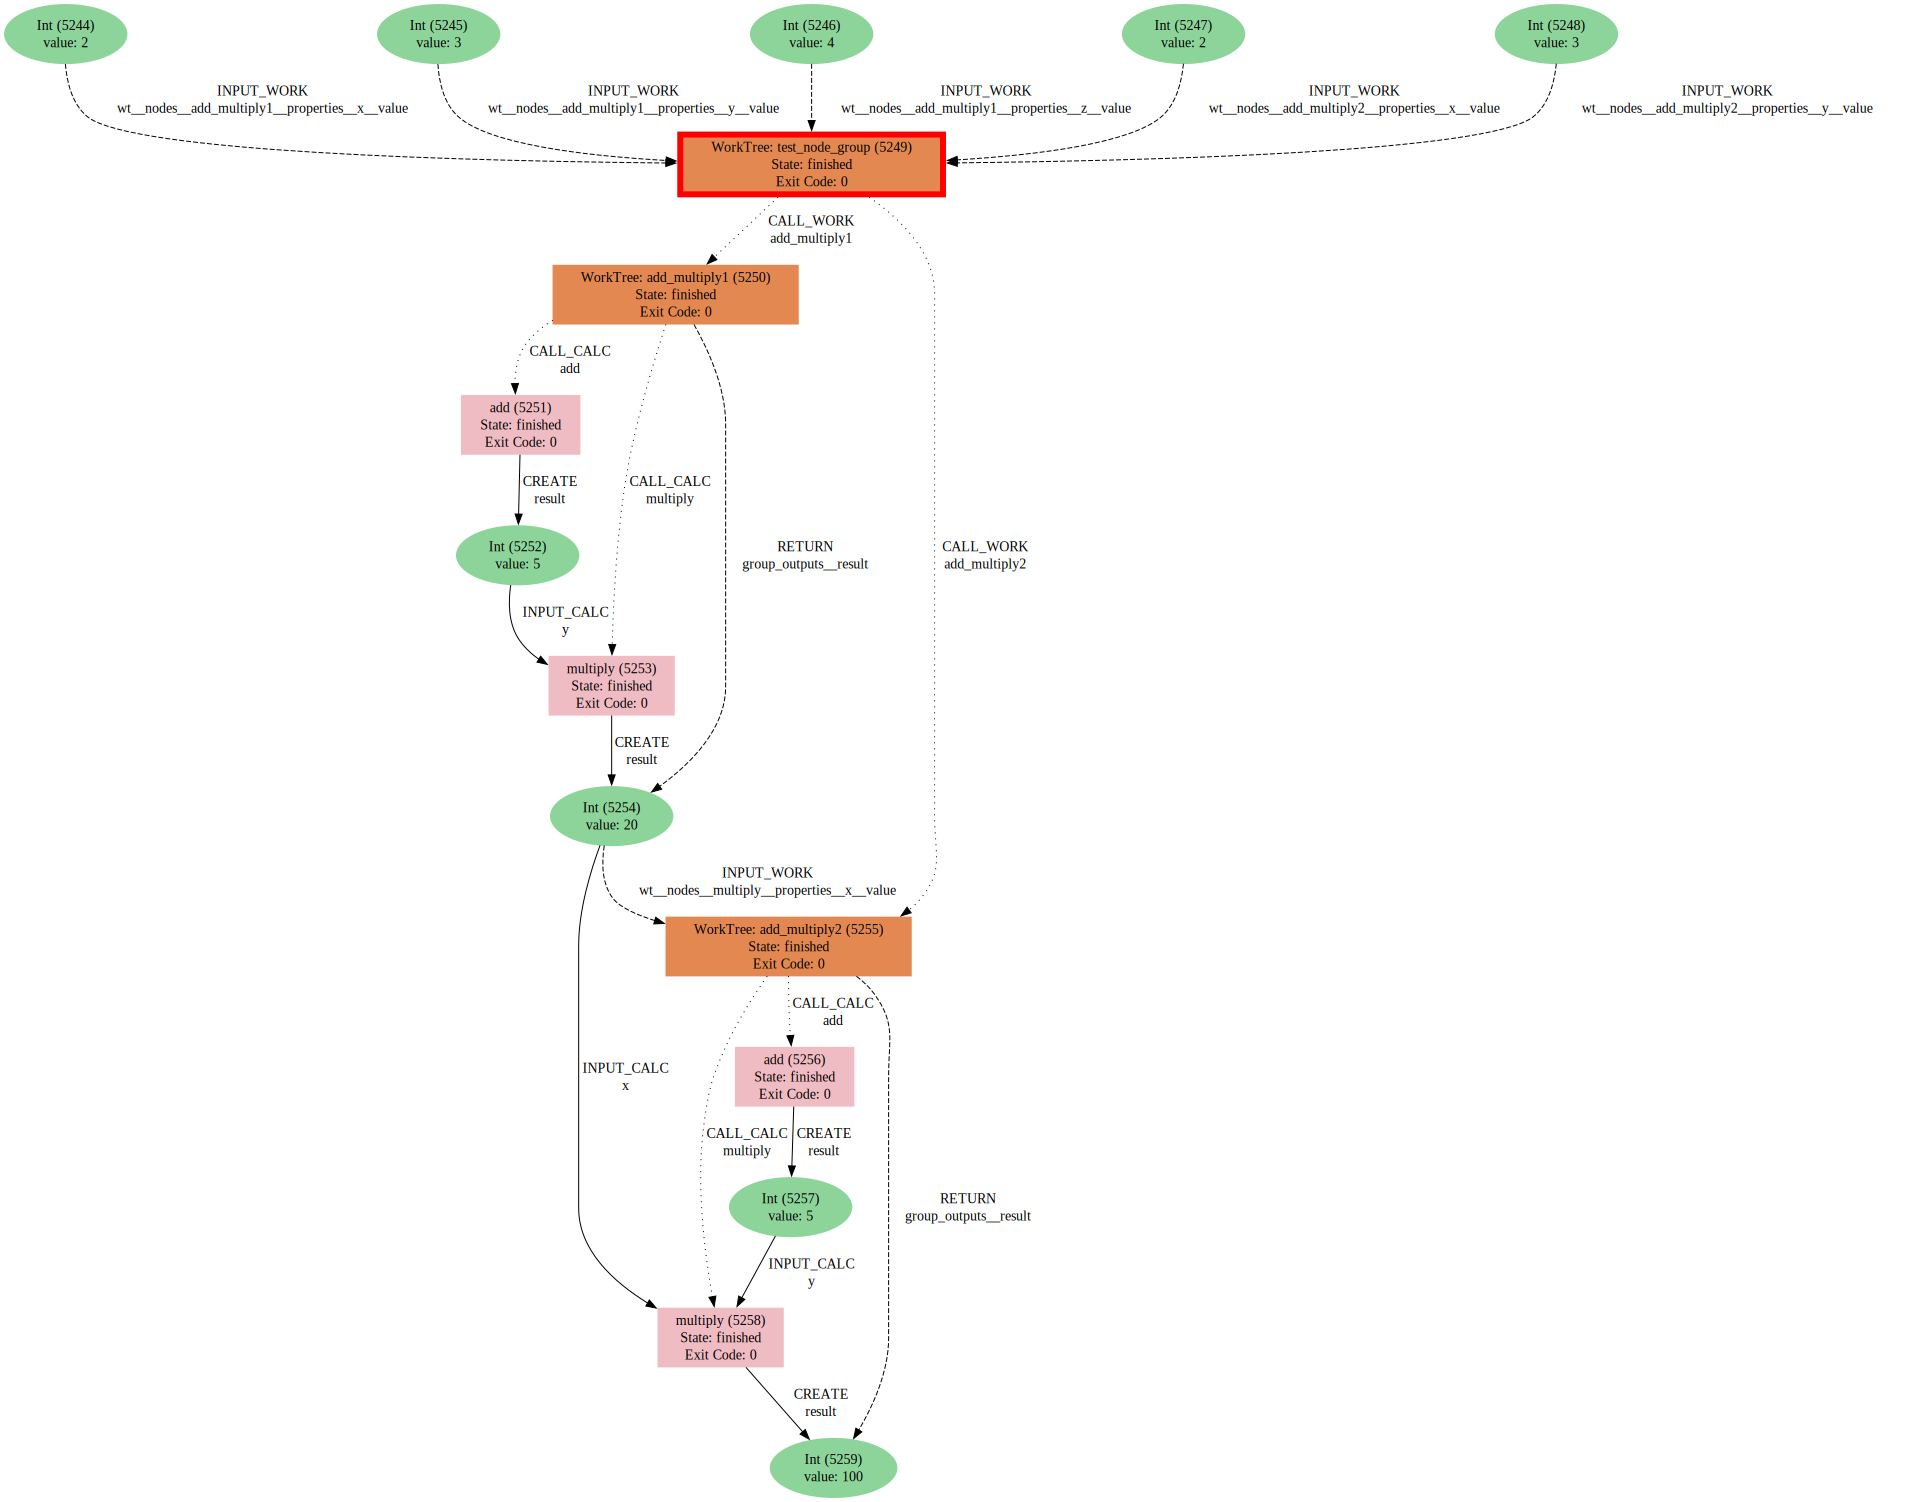

In [6]:
from aiida_worktree.utils import generate_node_graph
generate_node_graph(wt.pk)